
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/Banner_IA2_1.png" style="width:1500px;heigth:100px">



# <center> **02. Fundamentals of Machine Learning: Classification** </center>



## **Outline**
1. **The classification problem (CP)**
2. **CP from linear hypothesis: Logistic regression (LR)**
3. **Gradient descent for LR**





In [ ]:
#@title 1. MONTAR EL DRIVE  (If you are in in colab){ display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA2/ai-2-uis-student')
print(os.getcwd())

In [ ]:
#@title import libraries { display-mode: "form" }
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
import requests
import time
from IPython import display



# 1. **The classification problem (CP)**

In clasification problem we try to **finds** boundaries that separate classes (labels) $\mathbf{Y}$ given a set of features $\mathbf{X}$. 

The most common is a binary classification problem, so labels only can take the values $y = \{0, 1\}$. From a lineal hypothesis,  the **Boundaries** is a threshold that depending of dimensionality of features is a number, a "line", plane, or a hyperplane

Examples: 
- Emails: spam/ Not spam
- Cancer /Not cancer
- Parkinson / Not Parkinson

Multiclassification problems, it is defined by labels with $y = \{0,1,2,\ldots \}$

Go to the action!
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- We will joy with a artifitial dataset for classification. Please load and explain how to use the next functions in `sklearn`: 


```
make_classification
```
and
```
make_blobs
```
- Use two classes and two features. Also a total of 1000 samples.  Plot the results wit labels for each class. 

- How works linear regression in classification task?


(1000, 2) (1000,)


Text(0.5, 0, 'X_0')

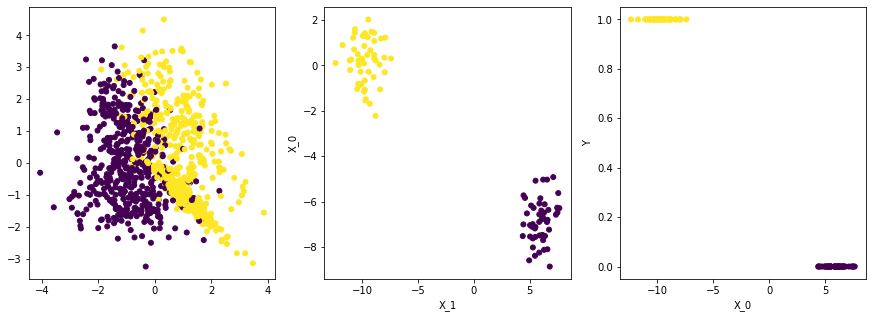

In [ ]:
#@title **code sudent** 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs


print(X1.shape, Y1.shape)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25)
ax = fig.add_subplot(1, 3, 2)
ax.set_ylabel('X_0');ax.set_xlabel('X_1')
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25)
ax = fig.add_subplot(1, 3, 3)
ax.set_ylabel('X_0'); ax.set_xlabel('X_1')
ax.scatter(X2[:, 0], Y2, marker='o', c=Y2, s=25)
ax.set_ylabel('Y');ax.set_xlabel('X_0')

# **2. CP from linear hypothesis: Logistic regression (LR)**
Based on linear regression formulation, we can formulate the problem to find a line, plane or hyper-plane that **separates** different kinds of elements!. 

- **Hypothesis representation** 

Let's consider 2 groups of elements (like generated by make_blobs), when for **classification**, the variable $y$ should take values of 0 or 1.

 Then, we should envolve *linear regression function* with sigmoid function $g$, as: 
$$\hat{y} = f_{\omega}(x) = g(\underset{z}{\underbrace{\omega_0 + \omega_1 x + \epsilon}})$$

This sigmoid or logistic function $f_{\omega}(x)$, with $z = \omega_0+\omega_1x$,  is defined as: 

| | |
|:-------------------------:|:-------------------------:|
|$$\LARGE g = \frac{1}{1+e^{-z}}$$ |  <center><img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/logistic_transformation.png" width="400"></center>|

The interpretation of $f_{\omega}(x) $ can be done by probability of predict $y=1$ if $f_{\omega}(x) \geq 0.5$, defined as: 

$$\hat{y} = f_{\omega}(x) = P(y=1|x;\omega)$$

and then **(b)** $P(y=0|x;\omega) = 1 - P(y=1|x;\omega)$. Also, note that: 

- $g(z) \geq 0.5$ when $z \geq 0$
- so,  $(\omega_0 + \omega_1 x) \geq 0$
- $\hat{y}=1$ when  $(\omega_0 + \omega_1 x) \geq 0$ 

Because, we have a binary classificatio (Bernoulli distribution), from **b**, we can write: 
$$P(y|\ x;\omega) = P(y=1|x;\omega)^{y}(1-P(y=1|x;\omega))^{1-y}$$

Then, the likelihood function on the whole set of $n$ samples:

$$L(x;\omega) = \prod_{i=1}^{n}P(y=1|x;\omega)^{y}(1-P(y=1|x;\omega))^{1-y}$$


We can use the log-likelihood, because  logarithmic function is a monotone increasing function. If we apply logarithm ($\log{(m^n)} = n\log{m}$), we obtain:



$$log\ L(x;\omega) = \sum_{i=1}^{n}y_{i}\log(P(y=1|x;\omega)) + (1-y_{i})\log(1-P(y=1|x;\omega))$$

$$log\ L(x;\omega) = \sum_{i=1}^{n}y_{i}\log(\hat{y}) + (1-y_{i})\log(1- \hat{y})$$

**THIS IS MY NEW COST FUNCTION RULE!!!**

This function is known as the **log-likelihood** and is our error or loss function. Minimizing the **negative** log likelihood corresponds to maximizing the likelihood.

With this function we want to find the parameters that **maximize** the log-likelihood function or what is equivalent to **minimize** the function to find the parameters that generate the least error possible  for our entire sample set. 

$$J(\omega) = -\frac{1}{n}\sum_{i=1}^{n}y_{i}\log(\hat{y}) + (1-y_{i})\log(1-\hat{y})$$


**A CROSS ENTROPY FOR A BINARY PROBLEM**

- **For logistic regression, this function is CONVEX!**
This is an example, and know, we will to construct our logistic regression

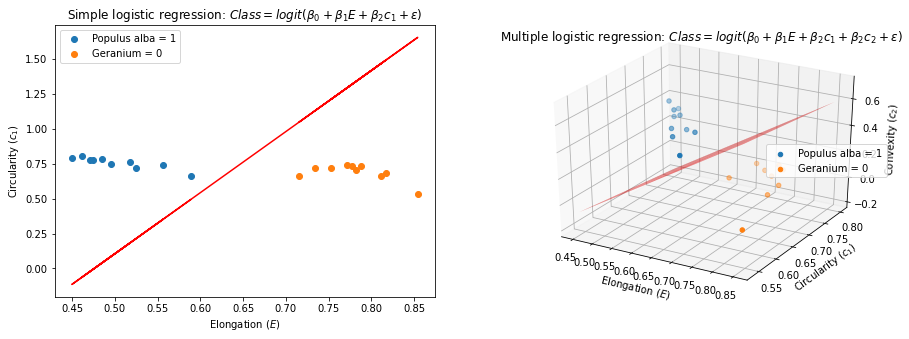

<Figure size 432x288 with 0 Axes>

In [ ]:
#@title Logistic regression plots { display-mode: "form" }

%run -i 'code/plot_class_1_2.py'

# **3. Gradient descent for LR**

The algorithm is the same, we just need to define the cost, and gradient of the cost. The we can operate the gradient descent

### **Cost function**
The log likelihood rule, can we written as: 
$$
J(\omega) = \left\{\begin{matrix}
- \log(\hat{f_{\omega}(x)}) &\text{if} & y=1\\ 
- \log(1-\hat{f_{\omega}(x)}) &\text{if} & y=0
\end{matrix}\right.$$

This define our cost function: 
$$J(\omega) = -\frac{1}{n}\sum_{i=1}^{n}y_{i}\log(\hat{y}) + (1-y_{i})\log(1-\hat{y})$$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement the cost function

Remember that the calculation of $\hat{y}$ is done through the **linear** and **sigmoid** function.

In [ ]:
#@title **code:** Sigmoid, linear, and prob functions
def sigmoid(x):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-x))

def linear(w, x):
    # Computes the weighted sum of inputs
    n = x.shape[0]
    return (1 / n) * np.dot(x, w.T)

def prob(linear):
    # Returns the probability after passing through sigmoid
    return sigmoid(linear)

In [ ]:
#@title **code student**  student:  Cost function implementation
def cost_function(w, x, y):
    # Computes the cost function for all the training samples
    n = x.shape[0]
    linear_value = ....
    probabilities = .....
    total_cost =  ...
    return total_cost

# evaluated on blobs dataset
w = np.zeros(2).reshape(1, 2)
cost_function(w, X2, Y2)

693.1471805599462

### Gradient of $J(\omega)$

$$\frac{\partial J(\omega)}{\partial \omega_j}=\frac{1}{n}\sum_{i=1}^{n}(\hat{y_i}-y_{i})x_{i}^{j}$$

Or equivalently in a matrix notation:

$$\frac{\partial J(\omega)}{\partial \omega}=\frac{1}{n}X^T(\hat{Y}-Y)$$

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Implement this gradient function

In [ ]:
#@title **code student:** student Gradient of cost J function implementation 
def gradient(prob, x, y):
    # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    dev_J = ...
    return dev_J

The function should calculates the predictions ($\hat{y}$) and computes the gradient ($\nabla J(\omega)$).

In [ ]:
#@title **code** gradient over prob
def cost_gradient(x, y, w):
    linear_value = linear(w, x)
    probabilities = prob(linear_value)
    return gradient(probabilities, x, y)      

### Gradient descent algorithm computation

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Complete implementation

In [ ]:
#@title **code student** def descenso_gradiente

def grad_des_ew(X, Y, w_0, w_1, w_2, learning_rate, batch):
    costs = []
    w = np.array([w_0,w_1, w_2])
    for i in range(batch):
      costs.append(cost_function(w, X, Y))
      dlldw = ...
      w_new = ...
      if i > batch or np.sum(np.abs(w - w_new))<0.00001:
        print("iter: ", i,  " dif cost: ", np.sum(np.abs(w - w_new)))
        break
      w = w_new 

    return w, costs


X_pon =  np.concatenate((np.ones(X2.shape[0]).reshape(X2.shape[0], 1), X2), axis=1)
print(X2.shape, X_pon.shape,unos.shape)
w, costs = grad_des_ew(unos, Y2, 18, -10, 11,  0.9, 500)
print(w.shape)

(100, 2) (100, 3) (100, 3)
(3,)


In [ ]:
#@title **code** plot your results
x2_est= (-(w[1]*X2[:, 0]) - w[0]) /w[2]
y_class = w[0] + w[1]*X2[:, 0]+ w[2]*X2[:, 1]
y_c = sigmoid(y_class)*1

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 3, 1)
ax.scatter(X2[:, 0], X2[:, 1], marker='o', c=y_c, s=25)
ax.plot(X2[:, 0] , x2_est, c="red")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax = fig.add_subplot(1, 3, 2)
ax.plot(range(len(costs)) , costs, c="red")
ax = fig.add_subplot(1, 3, 3)

ax.scatter(X2[:, 0], Y2, marker='o', c=y_c, s=25)
ax.plot(X2[:, 0] , x2_est, c="red")


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

Now, we will to work with **[Leaf dataset](https://archive.ics.uci.edu/ml/datasets/Leaf)**. 

- What about this dataset?
- Load the dataset with pandas (`data/leaf_class_1.csv`) and use: 
  - Geometrical features of leafs in this case: Specie, Elongation, Convexity, Circularity

- We only will take two classes: Geranium (n==36), Populus_alba (n==15)
  - Take defined features $(\mathbf{X})$ of only two defined clases
  - Define a $(\mathbf{Y})$ vector with Geranium==0 and Populus_alba==1

In [ ]:
#@title **code** Loading leaf dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_leaf = pd.read_csv('data/leaf_class_1.csv',error_bad_lines=False, 
                        header=None, usecols=[0,4,5,7], names=['Specie', 'Elongation', 'Convexity', 'Circularity'] )
data_leaf.head()

Specie  Elongation  Convexity  Circularity
0       1     0.32396    0.98535      0.83592
1       1     0.36116    0.98152      0.79867
2       1     0.38998    0.97755      0.80812
3       1     0.35376    0.97566      0.81697
4       1     0.44462    0.97698      0.75493

In [ ]:
#@title **code student**

# select the features for each type of leaf
Geranium = ....
Populus_alba = ....
# Indicate the classification variable
Y = ....
# Concatenate to form the training data
X = np.vstack([Geranium, Populus_alba])
X = np.concatenate([np.ones(shape=(Y.shape[0],1)), X], axis=1)

In [ ]:
#@title **code student** Run Gradient Descent
def gradient_descent_method(learning_rate, iterations):
    # Parameters
    i = 0
    iterations = iterations 
    learning_rate = learning_rate
    # STEP 1
    # Definition and initialization of the coefficients beta
    b0 = np.zeros(3).reshape(1, 3)
    beta = b0 
    # To store the cost value in each iteration
    costs = []

    while True:
        # Cost computation
        costs.append(cost_function(beta, X, Y))
        # STEP 2
        # Gradient computation
        dlldbeta =  ....
        # STEP 3
        # Coefficients updating
        beta_new =  ....
        i += 1
        # STEP 4
        # Calculate error tolerance to stop the algorithm 
        # The algorithm stops when it reaches the limit number of iterations 
        # or when it has a small error
        if i > iterations or np.sum(np.abs(beta - beta_new))<0.00001:
            break
        beta = beta_new 

        # plot the results
        if i% 100 == 0:
            print('Learning rate:{}'.format(learning_rate))
            print('Iteration: {} of {}'.format(i, iterations))
            plot_gradient_descent_step(X, beta, costs, Populus_alba, Geranium, iterations)
            display.clear_output(wait=True)
            time.sleep(0.1)

In [ ]:
#@title Gradient Descent plot { display-mode: "form" }
def plot_gradient_descent_step(X, beta, costs, Populus_alba, Geranium, iterations):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    ax1.set_title('Cost vs iteration');
    ax1.set_xlabel('Iteration');
    ax1.set_ylabel('Cost');
    ax1.plot(costs);
    ax1.set_xlim([0, iterations]);
    ax1.set_ylim([0, 1]);
    ax2.scatter(Populus_alba[:, 0], Populus_alba[:, 1], label='Populus alba = 1');
    ax2.scatter(Geranium[:, 0], Geranium[:, 1], label='Geranium = 0');
    y = (-(beta[0][1]*X[:,1]) - beta[0][0]) /beta[0][2]
    ax2.plot(X[:,1],y, c='r');
    ax2.set_ylim([-0.25, 1]);
    ax2.set_title('Boundary');
    ax2.set_xlabel(r'Elongation ($E$)');
    ax2.set_ylabel(r'Circularity ($c_1$)');
    plt.legend();
    plt.show()

def gradient_descent_plot():
    import ipywidgets as widgets
    from ipywidgets import interact
    import matplotlib.pyplot as plt
    import numpy as np 
    values=[1/pow(10,j) for j in range(1, 5)]
    widgets.interact(gradient_descent_method,
                      iterations=widgets.IntSlider(min=1000, max=50000, step=1000, value=20000), 
                      learning_rate=widgets.SelectionSlider(options=[("%g"%i,i) for i in values]),
                      )

gradient_descent_plot()  

interactive(children=(SelectionSlider(description='learning_rate', options=(('0.1', 0.1), ('0.01', 0.01), ('0.…

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- What about multiclassification problem?
- What about Non linear boundaries?
- Homework: Which is the derivate of sigmoid function?


# **References**

[1. Introduction to Deep Learning From Logical Calculus to Artificial Intelligence](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2016_Book_IntroductionToStatisticsAndDat.pdf)

[2. Introduction to Data Science A Python Approach to Concepts, Techniques and Applications ](https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/blob/master/bib/student_2017_Book_IntroductionToDataScience.pdf)

[3. Neural network internals](https://becominghuman.ai/neural-network-learning-internals-logistic-regression-8fb086e47867)

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">